# Prerequirments

In [1]:
import torch
import matplotlib.pyplot as plt

from torchvision.transforms import functional as F
from matplotlib.animation import FuncAnimation
from functools import partial
from IPython.display import HTML
from torch.optim import Adam

from IPython.display import clear_output
import time

In [2]:
def show_data(X, y, b, c, d):
    fig, axs = plt.subplots(1, 7, figsize=(1.5 * 7, 7))

    # Plot X
    axs[0].imshow(F.to_pil_image(X), cmap='hot')
    axs[0].set_title('X')
    axs[0].axis('off')

    # Plot b
    b_show = torch.ones(X.shape)
    b_show[:b.shape[0], int(X.shape[1] / 2)] = b.reshape(-1)
    axs[1].imshow(F.to_pil_image(b_show), cmap='hot', aspect=1)
    axs[1].set_title('b')
    axs[1].axis('off')

    # Plot X**2
    axs[2].imshow(F.to_pil_image(X**2), cmap='hot')
    axs[2].set_title('X**2')
    axs[2].axis('off')

    # Plot c
    c_show = torch.ones(X.shape)
    c_show[:c.shape[0], int(X.shape[1] / 2)] = c.reshape(-1)
    axs[3].imshow(F.to_pil_image(c_show), cmap='hot', aspect=1)
    axs[3].set_title('c')
    axs[3].axis('off')

    # Plot X**3
    axs[4].imshow(F.to_pil_image(X**3), cmap='hot')
    axs[4].set_title('X**3')
    axs[4].axis('off')

    # Plot d
    d_show = torch.ones(X.shape)
    d_show[:d.shape[0], int(X.shape[1] / 2)] = d.reshape(-1)
    axs[5].imshow(F.to_pil_image(d_show), cmap='hot', aspect=1)
    axs[5].set_title('d')
    axs[5].axis('off')


    # Plot y
    y_show = torch.ones(X.shape)
    y_show[:y.shape[0], int(X.shape[1] / 2)] = y.reshape(-1)
    axs[-1].imshow(F.to_pil_image(y_show), cmap='hot')
    axs[-1].set_title('y')
    axs[-1].axis('off')

    return fig, axs

In [3]:
def show_y(y, yhat):
    fig, axs = plt.subplots(1, 2, figsize=(1.5 * 2, 5))

    # Plot y
    axs[0].imshow(F.to_pil_image(y), cmap='hot')
    axs[0].set_title('y')
    axs[0].axis('off')

    # Plot yhat
    axs[1].imshow(F.to_pil_image(yhat), cmap='hot')
    axs[1].set_title('yhat')
    axs[1].axis('off')

    return fig, axs

# Difine Matrices

In [4]:
n = 40
p = 5
X = torch.rand(n, p) * 10

b = torch.rand(p, 1) * 10
c = torch.rand(p, 1) * 10
d = torch.rand(p, 1) * 10

y = X @ b + X**2 @ c + X**3 @ d

/tmp/ipykernel_215270/3356744546.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


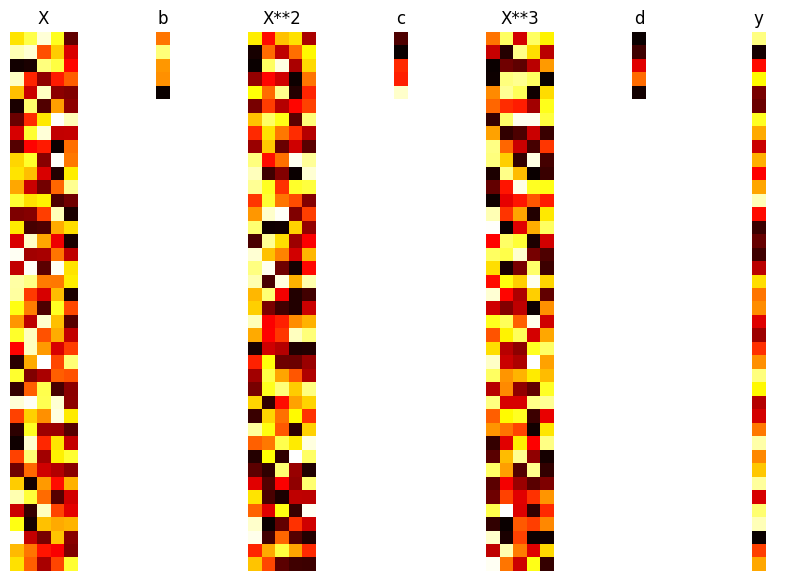

In [5]:
fig, axs = show_data(X, y, b, c, d)

fig.show()

In [9]:
X[:5, :5]

tensor([[5.7314, 7.8500, 5.9827, 7.8063, 4.1604],
        [7.9542, 8.9913, 5.5128, 8.7078, 4.3371],
        [0.0252, 8.0682, 8.9038, 4.8304, 2.3899],
        [9.9796, 7.4560, 5.2348, 1.4184, 6.5351],
        [1.6617, 4.3126, 0.9427, 0.2055, 1.1935]])

# Train Test Split

In [10]:
import random

In [11]:
indices = [i for i in range(X.shape[0])]

train_indices = random.sample(indices, 30)
test_indices = [i for i in indices if i not in train_indices]

In [12]:
X[[1, 5, 7]]

tensor([[7.9542, 8.9913, 5.5128, 8.7078, 4.3371],
        [2.0448, 1.8621, 1.1227, 0.6110, 1.2119],
        [8.3485, 5.8170, 9.9967, 4.3016, 2.2970]])

In [13]:
X[test_indices]

tensor([[9.9796, 7.4560, 5.2348, 1.4184, 6.5351],
        [8.3485, 5.8170, 9.9967, 4.3016, 2.2970],
        [1.7155, 2.6662, 9.3555, 0.0483, 9.7635],
        [3.8082, 3.7213, 0.7364, 2.1202, 6.1914],
        [6.9360, 3.8927, 5.5758, 3.5611, 7.7557],
        [2.7753, 6.5831, 8.1451, 9.8191, 9.5205],
        [0.7890, 5.9586, 8.5282, 2.6387, 8.3148],
        [6.0864, 7.8101, 5.2540, 0.2310, 6.1501],
        [6.7917, 0.0280, 5.6796, 4.6393, 3.6533],
        [5.7258, 5.5310, 4.2652, 7.5032, 4.8131]])

In [14]:
y[test_indices]

tensor([[ 5662.8735],
        [ 9367.2295],
        [11975.1787],
        [ 1946.5354],
        [ 5031.3652],
        [14740.1787],
        [ 9485.3154],
        [ 5391.6274],
        [ 2393.2800],
        [ 4173.9395]])

In [15]:
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

# Pytorch Linear Regression

2 (1).svg

In [16]:
h = torch.nn.Linear(p, 1)

In [17]:
h(X_train)

tensor([[ 1.5876],
        [ 0.6422],
        [-4.3699],
        [ 1.1028],
        [ 2.6034],
        [ 1.1609],
        [ 0.0475],
        [ 0.9742],
        [-0.4922],
        [ 1.5829],
        [-0.3285],
        [ 1.5068],
        [-0.2699],
        [-0.7578],
        [ 0.9283],
        [ 1.0078],
        [ 1.6845],
        [ 1.0237],
        [-0.2107],
        [-3.2386],
        [-1.2770],
        [ 0.9012],
        [-2.9741],
        [ 0.8362],
        [-0.8814],
        [ 1.2660],
        [-1.5758],
        [ 0.2101],
        [-2.4150],
        [-1.3280]], grad_fn=<AddmmBackward0>)

In [18]:
optimizer = Adam(params=h.parameters(), lr=0.1)

loss_func = torch.nn.MSELoss()

In [19]:
epoch = 2000
for i in range(epoch):
    loss = loss_func(h(X_train), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # clear_output(wait=True)
    print(f'{loss.item():.2f}')

44124244.00
44090760.00
44057288.00
44023832.00
43990396.00
43956972.00
43923568.00
43890168.00
43856796.00
43823440.00
43790096.00
43756772.00
43723464.00
43690176.00
43656896.00
43623644.00
43590404.00
43557188.00
43523988.00
43490804.00
43457640.00
43424504.00
43391368.00
43358268.00
43325180.00
43292108.00
43259060.00
43226040.00
43193024.00
43160040.00
43127068.00
43094120.00
43061188.00
43028284.00
42995396.00
42962524.00
42929676.00
42896848.00
42864052.00
42831260.00
42798492.00
42765752.00
42733032.00
42700328.00
42667644.00
42634988.00
42602344.00
42569728.00
42537132.00
42504552.00
42471992.00
42439460.00
42406940.00
42374452.00
42341980.00
42309524.00
42277100.00
42244688.00
42212304.00
42179932.00
42147592.00
42115268.00
42082964.00
42050684.00
42018420.00
41986180.00
41953960.00
41921764.00
41889584.00
41857424.00
41825292.00
41793180.00
41761088.00
41729020.00
41696964.00
41664936.00
41632924.00
41600940.00
41568972.00
41537028.00
41505100.00
41473200.00
41441308.00
4140

In [20]:
linear_loss = loss_func(h(X_test), y_test)

linear_loss

tensor(18952916., grad_fn=<MseLossBackward0>)

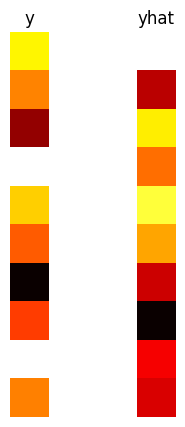

In [21]:
show_y(y_test, h(X_test));

# MLP

3.svg

In [77]:
class MLP(torch.nn.Module):

    def __init__(self, p):
        super().__init__()
        self.linear1 = torch.nn.Linear(p, 40)
        self.linear2 = torch.nn.Linear(40, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.nn.functional.relu(x)
        x = self.linear2(x)
        return x

In [96]:
mlp = MLP(p)

In [97]:
mlp(X_train)

tensor([[3.7948],
        [3.6171],
        [2.7963],
        [1.4355],
        [4.2651],
        [3.2239],
        [2.9561],
        [3.6363],
        [3.5086],
        [3.9111],
        [1.0388],
        [3.2394],
        [3.7266],
        [2.9407],
        [4.2198],
        [3.3790],
        [3.3974],
        [3.4825],
        [3.3842],
        [2.7240],
        [5.1911],
        [3.2922],
        [2.4089],
        [2.8581],
        [1.4956],
        [2.5854],
        [2.2688],
        [1.0198],
        [4.2953],
        [2.7256]], grad_fn=<AddmmBackward0>)

In [98]:
for o in mlp.parameters():
    print('--------')
    print(o)

--------
Parameter containing:
tensor([[ 0.1783,  0.2197,  0.4144,  0.2976, -0.2150],
        [-0.1043,  0.1503, -0.3342,  0.1716, -0.1534],
        [-0.0878,  0.2288, -0.2748,  0.2088, -0.2327],
        [-0.0415, -0.2169, -0.1648,  0.0104, -0.2067],
        [ 0.2319,  0.2326,  0.2971, -0.1049, -0.4006],
        [ 0.0199, -0.1513,  0.2958,  0.4070, -0.1842],
        [ 0.2883,  0.1004, -0.1210,  0.1168, -0.0590],
        [ 0.1900, -0.0553, -0.1114,  0.2844,  0.1484],
        [ 0.1732,  0.0324,  0.0571,  0.3690, -0.2996],
        [-0.0353,  0.1527,  0.4362, -0.0998, -0.4064],
        [-0.1692, -0.1757, -0.0924,  0.3212, -0.0208],
        [ 0.1409, -0.1638,  0.4159,  0.1256,  0.4043],
        [ 0.2326, -0.0741, -0.1312, -0.3147, -0.0929],
        [-0.0534,  0.1058, -0.0958, -0.0385,  0.1035],
        [ 0.0534, -0.0093,  0.4445, -0.3972,  0.3707],
        [-0.3975, -0.4404, -0.1566, -0.4147, -0.1656],
        [ 0.2649, -0.4409, -0.2454, -0.3762, -0.3340],
        [ 0.1906,  0.0011,  0.0459

In [99]:
optimizer = Adam(params=mlp.parameters(), lr=0.01)

In [100]:
loss_func = torch.nn.MSELoss()

In [101]:
epoch = 15000
for i in range(epoch):
    loss = loss_func(mlp(X_train), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # clear_output(wait=True)
    # print(f'epoch : {i}')
    print(f'{loss.item():.2f}')

44081480.00
44068204.00
44054292.00
44039596.00
44023984.00
44007316.00
43989524.00
43970480.00
43950040.00
43928168.00
43904768.00
43879760.00
43852988.00
43824468.00
43794072.00
43761708.00
43727368.00
43690980.00
43652504.00
43611920.00
43569188.00
43524236.00
43476948.00
43427260.00
43375108.00
43320388.00
43263060.00
43203100.00
43140432.00
43075024.00
43006744.00
42935596.00
42861568.00
42784596.00
42704640.00
42621656.00
42535560.00
42446300.00
42353896.00
42258256.00
42159340.00
42057148.00
41951672.00
41842804.00
41730572.00
41614996.00
41496056.00
41373740.00
41248040.00
41118932.00
40986444.00
40850540.00
40711228.00
40568504.00
40422372.00
40272844.00
40119912.00
39963580.00
39803848.00
39640732.00
39474220.00
39304304.00
39131016.00
38954372.00
38774356.00
38590972.00
38404200.00
38214044.00
38020544.00
37823748.00
37623684.00
37420380.00
37213884.00
37004216.00
36791424.00
36575556.00
36356652.00
36134756.00
35909912.00
35682184.00
35451616.00
35218264.00
34982180.00
3474

In [102]:
mlp_loss = loss_func(mlp(X_test), y_test)

mlp_loss

tensor(1393832.2500, grad_fn=<MseLossBackward0>)

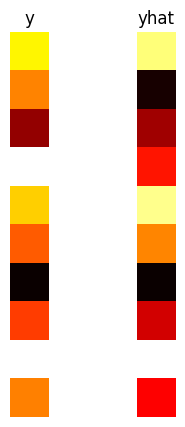

In [103]:
show_y(y_test, mlp(X_test));

In [104]:
print(linear_loss)
print(mlp_loss)

tensor(18952916., grad_fn=<MseLossBackward0>)
tensor(1393832.2500, grad_fn=<MseLossBackward0>)
